# Flash Model for [R32][emim_TF2N]
### Gabriela Franco
### 03/10/21

In [15]:
# import functions
import idaes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom
# import HFC_IL mixture properties
from HFC32_emimTf2N_PR import configuration

# Read data
data = pd.read_csv('R32_emimTf2N.csv')
data_283= data[0:7]

   **Run Parameter Estimation Function**

In [21]:
#run parameter estimation function

from binary_param import binary_params_peng
from HFC32_emimTf2N_PR import configuration

binary_params_peng('R32_emimTf2N.csv', configuration, 'R32', 'emimTf2N', "x_R32", "x_emimTf2N", 
    init_temp = 323.15, init_press = 399800, init_x_c1 = 0.5, init_x_c2 = 0.5,
    init_kappa_2_1 = 0.025, init_kappa_1_2 = -0.03, eps = 0.1, scaling_fac = 1e-4)

2021-03-10 10:54:13 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-10 10:54:13 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-10 10:54:13 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component emimTf2N was not assigned a type. Using generic Component object.
2021-03-10 10:54:13 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-10 10:54:13 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-10 10:54:13 [INFO] idaes.init.fs.state_block: Property

2021-03-10 10:54:15 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-10 10:54:15 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-10 10:54:15 [INFO] idaes.init.fs.state_block: Property package initialization: infeasible - Converged to a locally infeasible point. Problem may be infeasible..
2021-03-10 10:54:15 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-10 10:54:15 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-10 10:54:15 [WARNING] idaes.generic_models.properties.core.generic.g

2021-03-10 10:54:17 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-10 10:54:17 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-10 10:54:17 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component emimTf2N was not assigned a type. Using generic Component object.
2021-03-10 10:54:17 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-10 10:54:17 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-10 10:54:18 [INFO] idaes.init.fs.state_block: Property

2021-03-10 10:54:19 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-10 10:54:19 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-10 10:54:20 [INFO] idaes.init.fs.state_block: Property package initialization: infeasible - Converged to a locally infeasible point. Problem may be infeasible..
2021-03-10 10:54:20 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-10 10:54:20 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-10 10:54:20 [WARNING] idaes.generic_models.properties.core.generic.g

2021-03-10 10:54:22 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-10 10:54:22 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-10 10:54:22 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component emimTf2N was not assigned a type. Using generic Component object.
2021-03-10 10:54:22 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-10 10:54:22 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-10 10:54:22 [INFO] idaes.init.fs.state_block: Property

In [22]:
kappa1= -0.018059739008510666
kappa2= -0.01408977877696036
print('PR_kappa[R32,emimTf2N] = ', kappa1)
print('PR_kappa[emimTf2N,R32] = ', kappa2)

PR_kappa[R32,emimTf2N] =  -0.018059739008510666
PR_kappa[emimTf2N,R32] =  -0.01408977877696036


   **Create Flash Model**

In [23]:
m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

# set heat transfer tru, fix outlet T

DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

2021-03-10 10:54:24 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-10 10:54:24 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-10 10:54:24 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component emimTf2N was not assigned a type. Using generic Component object.
2021-03-10 10:54:24 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-10 10:54:24 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
The initial DOF is 7


In [24]:
# input infor into model
m.fs.F101.inlet.flow_mol.fix(1)                            # mol frac
m.fs.F101.inlet.temperature.fix(283.15)                    # K
m.fs.F101.inlet.pressure.fix(10200)                      # Pa
m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.014)         # mol frac
m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(0.986)    # mol frac
# fix state variables in  state block (inlet)
m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].unfix()

# initialize flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# DOF analysis
degrees_of_freedom(m.fs.F101)

# Solver
solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}
print(data_283)

   temperature  pressure  x_R32  x_emimTf2N
0       283.15     10200  0.014       0.986
1       283.15    100100  0.136       0.864
2       283.15    250300  0.306       0.694
3       283.15    399300  0.448       0.552
4       283.15    549300  0.570       0.430
5       283.15    700400  0.672       0.328
6       283.15    849400  0.786       0.214


**For all the temperatures**

In [25]:
# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].unfix()

R32_x = np.zeros((len(data)))
P = np.zeros((len(data)))

m.fs.liq = Param(mutable=True,default=0.040)
m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

for i in range(len(data)):
    m.fs.liq = data["x_emimTf2N"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data["x_R32"].iloc[i])+0.1)
    m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(data["x_R32"].iloc[i]+0.1)))
    m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))
    
#     DOF_final = degrees_of_freedom(m)
#     print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):

        R32_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
        P[i] = value(m.fs.F101.vap_outlet.pressure[0])

    else:
        print('Infeasible.')

**For just one temperature T=323.15 K**

In [37]:
# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].unfix()

R32_x_283 = np.zeros((len(data_283))) # liquid mol fraction of R32 out of flash
P_283 = np.zeros((len(data_283)))     # vapor pressure of system put of flash

m.fs.liq = Param(mutable=True,default=0.040)
m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

for i in range(len(data_283)):
    m.fs.liq = data_283["x_emimTf2N"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data_283["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data_283["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data_283["x_R32"].iloc[i])+0.1)
    m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(data_283["x_R32"].iloc[i]+0.1)))
    m.fs.F101.vap_outlet.temperature.fix(float(data_283["temperature"].iloc[i]))
    
#     DOF_final = degrees_of_freedom(m)
#     print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):

        R32_x_283[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32'])  # fill array with outlet liq mol fractions
        P_283[i] = value(m.fs.F101.vap_outlet.pressure[0])                  # fill array with outlet vapor pressure

    else:
        print('Infeasible.')

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().


In [38]:
solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}

In [39]:
status = solver.solve(m, tee = True)

Ipopt 3.13.2: tol=1e-06


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. S

In [40]:
# display solution
m.fs.F101.report()
# m.display()
# m.pprint()


Unit : fs.F101                                                             Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key             : Value   : Fixed : Bounds
          Heat Duty :  452.31 : False : (None, None)
    Pressure Change : -12534. : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                               Inlet    Vapor Outlet  Liquid Outlet
    flow_mol                    1.0000      0.46729       0.53271  
    mole_frac_comp emimTf2N    0.11400   1.0000e-08       0.21400  
    mole_frac_comp R32         0.88600       1.0000       0.78600  
    temperature                 283.15       283.15        283.15  
    pressure                8.4940e+05   8.3687e+05    8.3687e+05  


In [41]:
print(P_283)
print(data_283["pressure"])
print(R32_x_283)
print(data_283["x_R32"])

[ 12602.81220346 125068.90611181 290702.33824004 438662.14228862
 574279.66196476 694637.85717929 836865.51640329]
0     10200
1    100100
2    250300
3    399300
4    549300
5    700400
6    849400
Name: pressure, dtype: int64
[0.014 0.136 0.306 0.448 0.57  0.672 0.786]
0    0.014
1    0.136
2    0.306
3    0.448
4    0.570
5    0.672
6    0.786
Name: x_R32, dtype: float64


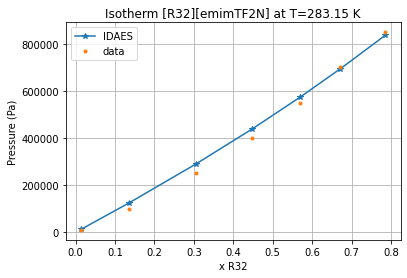

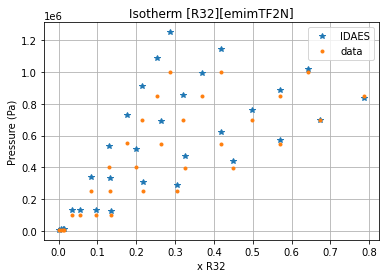

In [42]:
plt.plot(R32_x_283,P_283,"-*",label="IDAES")  
plt.plot(data_283["x_R32"],data_283["pressure"],".",label="data")  

plt.title('Isotherm [R32][emimTF2N] at T=283.15 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(R32_x,P,"*",label="IDAES")  
plt.plot(data["x_R32"],data["pressure"],".",label="data")  

plt.title('Isotherm [R32][emimTF2N]')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
plt.legend()
plt.show()